<a href="https://colab.research.google.com/github/mahalingamagesthian/learningai/blob/main/09_SupervisorAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This page is inspired from https://langchain-ai.github.io/langgraph/tutorials/multi_agent/agent_supervisor/

# Goal
creating a supervisor agent step into more advanced, multi-agent AI systems

This `pip install` command is simply setting up your Python environment by installing (or updating) the necessary libraries. Let's break down each part:

1. `pip install:`

  * `pip`: This is Python's **standard package** installer. Think of it as a tool that helps you download and set up pre-written code (libraries or packages) from the internet (specifically, from PyPI - the Python Package Index) so you can use them in your own Python projects.
  * `install`: This command tells `pip` to go ahead and fetch those specified packages and make them available for your Python programs.

2. `-U (or --upgrade)`:

  * This is an option for the install command.
  * It stands for `"upgrade"`. If any of these packages are already installed on your system, `pip` will upgrade them to their latest compatible versions. This is good practice to ensure you're using the most up-to-date features and bug fixes.

3. `langgraph:`

  * `What it is:` This is a powerful library for **building stateful, multi-actor applications** with LLMs.
  * `Why it's important for AI Engineering:` It allows you to define complex workflows (like the RAG agent you just built!) where different `"actors"` (which could be LLMs, tools, or other agents) interact sequentially or conditionally, maintaining a shared "state" (memory) as they go. It's essential for creating autonomous agents that can perform multi-step reasoning and interaction.

4. `langgraph-supervisor`:

  * `What it is`: This is a specific extension or module built on top of `langgraph`. It provides functionality directly related to creating supervisor agents.
  * `Why it's important for AI Engineering (and your goal):` A supervisor agent is essentially a `"manager"` LLM or a control mechanism that oversees the operations of multiple other `"worker"` agents. It decides which worker agent should act next based on the current goal and the state of the conversation. This is a common and effective pattern for tackling complex problems by breaking them down and assigning them to specialized sub-agents. You'll be using this to build your supervisor!

5. langchain-tavily:

   * `What it is`: This is a LangChain integration for **Tavily**, which is a search API specifically designed for AI agents.
   * `Why it's important for AI Engineering:` In the world of AI agents, they often need access to up-to-date, real-world information. While RAG (Retrieval-Augmented Generation) from your own documents is great, sometimes you need to perform live web searches. Tavily provides a robust, real-time search capability that agents can use as a tool to find information beyond their internal knowledge base. This significantly enhances their capabilities.
6. `langchain[openai]`:

   * `langchain`: This is the foundational framework for developing applications powered by language models. It provides standard interfaces for interacting with LLMs, managing prompts, chaining operations, integrating tools, and building agents. Your RAG agent utilized many LangChain components.
   * `[openai]`: This part is called an `"extra"` or `"optional dependency."` It means that you're installing the core langchain library, plus additional components specifically for integrating with OpenAI's models (`like GPT-4o, GPT-4.1-mini, etc.)`. This ensures all the necessary drivers and utilities for communicating with OpenAI's API are installed.

In [ ]:
pip install -U langgraph langgraph-supervisor langchain-tavily "langchain[openai]"

In [ ]:
import getpass
import os


def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("TAVILY_API_KEY")

This snippet provides a clear, concise example of how to programmatically perform a web search using Tavily (via LangChain's integration). It shows how to:
  * Set up the search tool.
  * Execute a query.
  * Access and print specific parts of the structured search results.

This is a fundamental building block for giving your AI agents the ability to look up real-time information from the internet, extending their knowledge beyond their training data or static vector stores.

# Detailed Explanation:
1. `from langchain_tavily import TavilySearch`

    * `from langchain_tavily:` This part imports from the specific Python package you just installed for Tavily integration (langchain-tavily).
    * `import TavilySearch:` This imports the TavilySearch class. This class is a "wrapper" or "connector" provided by LangChain that knows how to talk to the Tavily Search API. It abstracts away the complex details of making API requests, handling responses, etc. You just tell it what to search for, and it handles the communication with Tavily.
2. `web_search = TavilySearch(max_results=3)`

    * `web_search =:` You are creating an instance (an object) of the TavilySearch class and assigning it to the variable web_search. Think of web_search as your configured "Tavily Search tool" now.
    * `TavilySearch(...):` When you create this object, you can pass parameters to configure how it behaves.
    * `max_results=3:` This is a crucial parameter. It tells Tavily Search to return at most 3 search results for any query you make using this web_search object. This is useful for controlling the amount of information returned, especially when you're feeding it to an LLM, as more data can cost more tokens and sometimes lead to information overload.
    * Important Note (Implicit): For this line to work, you must have your TAVILY_API_KEY set up as an environment variable (e.g., os.environ["TAVILY_API_KEY"] = "your_key_here") or passed directly as a parameter. The TavilySearch class will automatically look for this key to authenticate your requests to the Tavily API.
3. `web_search_results = web_search.invoke("who is the mayor of NYC?")`

    * `web_search_results =:` This variable will store the results returned by the web search.
    * `web_search.invoke(...):` This is the method that actually executes the web search.
      * In LangChain, invoke() is a standard method part of the `Runnable interface`. It means "run this component with the given input and return the result."
      * "who is the mayor of NYC?": This is the search query that you are sending to the Tavily Search API.
    * `What invoke() returns:` When invoke() completes, web_search_results will be a Python dictionary. This dictionary contains the structured results from Tavily. A common structure is:
```
{
    "query": "who is the mayor of NYC?",
    "results": [
        {
            "url": "...",
            "content": "...", // The main content/snippet of the result
            "title": "..."
        },
        {
            "url": "...",
            "content": "...",
            "title": "..."
        },
        // ... up to 3 results due to max_results=3
    ],
    // ... other metadata
}
```
4. `print(web_search_results["results"][0]["content"])`

 * This line is designed to extract and print a specific piece of information from the `web_search_results` dictionary.
 * `web_search_results["results"]:` This accesses the value associated with the key "results" in the dictionary. This value is a list of individual search result dictionaries.
 * `[0]`: This is list indexing. It selects the first item (the first search result) from that list of results.
 * `["content"]`: This accesses the value associated with the key "content" within that first search result dictionary. This content key typically holds the most relevant text snippet or a summarized piece of information extracted from the search result, which is often what an LLM would need.
 * `print(...):` Finally, this displays the extracted content to your console.

In [3]:
from langchain_tavily import TavilySearch

web_search = TavilySearch(max_results=3)
web_search_results = web_search.invoke("who is the chief minister of Karnataka?")

print(web_search_results["results"][0]["content"])

Siddaramaiah is an Indian politician and present Chief Minister of Karnataka. He got inducted into the Chief Minister position of Karnataka after winning the state legislative assembly elections


This `research_agent` is a specialized AI "employee" in your future "AI company."

 * It's powered by an LLM (`gpt-4.1/gpt-4o`).
 * Its only skill is performing web searches (`web_search`).
 * It knows its job (research only, no math).
 * It knows how to communicate its findings back to its manager (the supervisor) in a clear, concise way.
 * It has a specific name (`"research_agent"`) so the supervisor can call upon it when research is needed.
This is a fundamental building block for your supervisor agent, enabling it to delegate specific tasks to specialized AI workers!

1. `from langgraph.prebuilt import create_react_agent`
 * `langgraph.prebuilt`: `LangGraph` provides some ready-to-use (prebuilt) components and patterns to make common agent setups easier.
 * `create_react_agent:` This is a convenience function that helps you quickly set up an agent that follows the **ReAct (Reasoning and Acting)** pattern.
    * **ReAct Agents:** These agents are designed to reason about what to do next and then act by using tools. They observe an input, decide if they need a tool, if so, they formulate arguments for the tool, execute it, observe the tool's output, and then repeat the cycle (reason, act, observe) until they have enough information to respond to the user (or, in this case, the supervisor).
2. `research_agent = create_react_agent(...)`
  * You are creating an instance of a ReAct agent and assigning it to the variable `research_agent`. This `research_agent` is now a fully functional, callable AI component within your `LangGraph` workflow.
3. `Parameters of create_react_agent:`
  * `model="openai:gpt-4.1":` This specifies the Large Language Model (LLM) that will serve as the "brain" for this particular `research_agent`. It's the LLM that will perform the "reasoning" part of the ReAct cycle.
  * Note: `gpt-4.1` might be a placeholder in your course. For a real-world scenario, you'd typically use a currently available model like `openai:gpt-4o`, `openai:gpt-4-turbo`, or `openai:gpt-3.5-turbo`. Each agent in a multi-agent system can potentially be powered by a different LLM, allowing you to choose the best model for a specific task (e.g., a cheaper, faster model for simple tasks, and a more powerful one for complex reasoning).
  * `tools=[web_search]:`
    * This is a **critical parameter** for any agent that needs to interact with the outside world.
    * It's a list of Runnable objects (which `web_search` is, as it uses the .invoke() method).
    * By providing [web_search], you are telling the `research_agent` that its only available tool is the `web_search` object (your TavilySearch instance).
    * This means if the `research_agent` decides it needs to find information online, it knows how to call `web_search` with a specific query.
 * `prompt=(...):`
    * This is the system prompt that defines the `research_agent's` persona, capabilities, and strict instructions. This prompt guides the LLM's behavior.
    * `"You are a research agent.\n\n":` Establishes its identity.
    * `"INSTRUCTIONS:\n- Assist ONLY with research-related tasks, DO NOT do any math\n":`
      * This explicitly sets the agent's scope and limitations. In a `multi-agent` system, this is vital. The supervisor needs to know what each worker can and cannot do. This prevents the research agent from trying to solve math problems when there might be a separate `"math_agent"` for that.
    * `- After you're done with your tasks, respond to the supervisor directly\n:`
      * This is a key instruction for multi-agent communication. It tells the `research_agent` how to signal that it has completed its specialized task.
      * When it's finished, it shouldn't just respond to the user; it should formulate its final output specifically for the supervisor to process.

    * `- Respond ONLY with the results of your work, do NOT include ANY other text.:`
      * This enforces a clean, parseable output format. The supervisor will need to understand the research_agent's results, so clear, unembellished output makes the supervisor's job easier.
      * It prevents the agent from adding conversational fluff like "Okay, I have found the answer!" and instead just provides the answer itself.
   * `name="research_agent":`
    * This assigns a unique identifier to this agent.
    * In a multi-agent system, the supervisor agent (which you'll define later) needs a way to refer to and select specific worker agents. This name will be used for that purpose.


In [4]:
from langgraph.prebuilt import create_react_agent

research_agent = create_react_agent(
    model="openai:gpt-4.1", # The LLM powering this agent
    tools=[web_search], # The tools this agent has access to
    prompt=(  # The system prompt defining its role and instructions
        "You are a research agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with research-related tasks, DO NOT do any math\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="research_agent", # A unique name for this agent
)

This snippet is a vital step because it:
 * `Validates the Worker Agent:` It confirms that your `research_agent` is correctly configured, can access and use its `web_search` tool, and can formulate an answer based on tool outputs.
 * `Demonstrates ReAct Pattern:` You are literally seeing the `"Reason" (decide to call tool) and "Act" (tool output, then final answer)` phases of a ReAct agent.
 * `Prepares for Supervisor:` Knowing that your worker agent functions correctly in isolation is crucial before you introduce the supervisor, which will orchestrate multiple such agents. You build reliable components first, then assemble them.

# Step-by-Step Flow of a ReAct Agent:

When you execute this code, you'll see a sequence of updates, each representing a `"thought"` or `"action"` by the `research_agent`. This is the core ReAct loop in action:

   1.  **Initial Input:** The `research_agent` receives the user message: `"who is the mayor of NYC?"`
   2. `Chunk 1: research_agent's Reasoning (Thought)`

     * The `research_agent's` LLM (`gpt-4.1 or gpt-4o`) receives the prompt and the user's question.
     * `It will reason:` "To answer `'who is the mayor of NYC?'`, I need to use my `web_search` tool."
     * The chunk yielded will contain an `AIMessage` that looks something like this (the exact format might vary slightly, but it often includes `tool_calls`):
```
============= AIMessage =============
tool_calls=[{'name': 'web_search', 'args': {'query': 'mayor of NYC'}}]
```
   3. **Chunk 2: Tool Execution (Action)**

     * The `create_react_agent`'s internal mechanism (which includes a ToolNode-like functionality) sees the `tool_calls` in the previous `AIMessage`.
     * It automatically executes the `web_search` tool with the query `"mayor of NYC"`.
     * The chunk yielded will contain a `ToolMessage` with the actual results from Tavily:
```
============= ToolMessage =============
name: web_search
content: Eric Adams is the 110th and current mayor of New York City, serving since January 1, 2022. He is a member of the Democratic Party... (and other relevant snippets)
```

4. **Chunk 3: research_agent's Final Response (Thought & Act)**

  * The `research_agent's` LLM now receives the original user question, its own reasoning process (the `AIMessage` from step 2), and crucially, the ToolMessage with the search results.
  * It will then synthesize this information to formulate a direct answer, following its prompt instructions ("Respond ONLY with the results of your work...").
  * The chunk yielded will contain a final AIMessage like:

```
============= AIMessage =============
Eric Adams is the current mayor of New York City, serving since January 1, 2022.
```
Lets break into the code:

1. `for chunk in research_agent.stream(...):`

  * research_agent: This is the instance of the ReAct agent you just created using `create_react_agent`.
  * `.stream(...):` Just like with your full RAG graph, the `stream()` method on the agent allows you to run it step-by-step and receive incremental updates (chunks) as it processes the query. This is incredibly helpful for understanding the agent's reasoning and action sequence.
  * Input `({"messages": [{"role": "user", "content": "who is the mayor of NYC?"}]})`:
     * This is the initial state (a simple message list with a user query) that you're feeding to the `research_agent`.
     * You're asking the `research_agent` directly, bypassing the `supervisor` for this test.
2. `Inner pretty_print_messages(chunk):`

  * `Assumption:` You have a helper function named `pretty_print_messages` defined somewhere else in your code. (I've included a common example implementation above for context, as it's not part of the standard LangChain library).
  * `Purpose of pretty_print_messages:` The chunk yielded by `agent.stream()` is often a dictionary containing state updates (like new messages added by the agent). This helper function's job is to take that chunk, extract the relevant messages, and print them in a human-readable format. LangChain's `BaseMessage` objects (like `AIMessage, HumanMessage, ToolMessage`) have their own `.pretty_print()` method, which is very useful.

In [5]:
from langchain_core.messages import convert_to_messages


def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [6]:
for chunk in research_agent.stream( # 1. Execute the research_agent with streaming
    {"messages": [{"role": "user", "content": "who is the chief minister of  Karnataka?"}]} # 2. Input query
):
    pretty_print_messages(chunk) # 3. Print the updates as they happen

Update from node agent:


================================== Ai Message ==================================
Name: research_agent
Tool Calls:
  tavily_search (call_qT1X9JFJhOoNxHA58OiJQ51t)
 Call ID: call_qT1X9JFJhOoNxHA58OiJQ51t
  Args:
    query: current chief minister of Karnataka


Update from node tools:


================================= Tool Message =================================
Name: tavily_search

{"query": "current chief minister of Karnataka", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "List of Chief Ministers of Karnataka & Their Tenure Periods", "url": "https://www.oneindia.com/list-of-chief-ministers-of-karnataka/", "content": "Since 1947, India has seen 24 Chief Ministers in Karnataka, starting from K Chengalaraya Reddy 1947 to the current serving Chief Minister Siddaramaiah who took oath in 2023.", "score": 0.9161773, "raw_content": null}, {"title": "List Of Karnataka Ministers: Siddaramaiah Cabinet - thecurrentindia", "url": "ht


By defining `math_agent`, you're furthering your understanding of:

1. `Tooling Integration`: How to expose custom Python functions as tools for an LLM agent to use.
2. `Agent Specialization:` The power of creating highly focused `"expert"` agents. Instead of one large, general-purpose LLM trying to do everything, you have a team where each member excels at a specific domain `(research, math, etc.)`.
3. `Modular AI Systems:` This approach makes your AI system more robust, easier to manage, and more scalable. If you need to improve math capabilities, you just update the `math_agent` or its tools, without affecting the `research_agent`.
4. `Preparation for Supervisor`: Both `research_agent` and `math_agent` are now ready to be plugged into your `supervisor` agent. The `supervisor` will be the `"traffic controller"` that directs incoming requests to the most appropriate specialized agent.


1.  **Defining the "Tools"** (add, multiply, divide)
These three Python functions (add, multiply, divide) are crucial because they represent the specific capabilities or `"tools"` that your `math_agent` will possess.

 * `Standard Python Functions:` They are just regular Python functions that perform basic arithmetic operations. The LLM itself won't actually perform the addition or multiplication; it will call these functions to get the result.
 * `Type Hints (a: float, b: float):` These are important. They tell `LangChain` (and subsequently the LLM) what kind of input arguments these functions expect (in this case, two floating-point numbers). This helps the LLM correctly format the arguments when it decides to call a tool.
 * `Docstrings ("""Add two numbers."""):` This is arguably the most important part for the LLM. The content of these docstrings is used by `LangChain` to describe the tool's purpose to the LLM. When the LLM is reasoning, it will see something like:
    * `add(a: float, b: float):` "Add two numbers."
    * `multiply(a: float, b: float):` "Multiply two numbers."
    * `divide(a: float, b: float):` "Divide two numbers." The LLM uses these descriptions to decide which tool is appropriate for a given task.

2. **Creating the math_agent** (create_react_agent(...))
You are again using the `create_react_agent` helper function, just like you did for the `research_agent`. This confirms you're building another ReAct (Reasoning and Acting) agent to be a specialized worker.

   * `math_agent =:` You're creating an instance of this specialized agent and naming it `math_agent`.

3. **Parameters of** `create_react_agent` (for the `math_agent`):
  * `model="openai:gpt-4.1":`

      * This is the LLM that will serve as the "brain" for your `math_agent`. It will be responsible for understanding mathematical queries and deciding which of its tools (add, multiply, divide) to use.
      * Again, ensure you're using an available model like `gpt-4o` or `gpt-4-turbo` for actual execution.
  * `tools=[add, multiply, divide]:`
      * This is the defining feature of your `math_agent`. This list provides the specific Python functions that the LLM powering this agent can "call" or "execute."
      * `LangChain` automatically takes these Python functions and converts them into a format (like a JSON schema) that the LLM can understand and generate "tool call" instructions for.
  * `prompt=(...):`
     * This is the system prompt that defines the `math_agent's` role and behavior. It's tailored specifically for math tasks.
     * `"You are a math agent.\n\n":` Clearly establishes its identity.
     * `"INSTRUCTIONS:\n- Assist ONLY with math-related tasks\n":` This is extremely important for a multi-agent system. It rigidly defines the math_agent's scope and limitations. It tells the agent not to try to do research, answer general knowledge questions, or any other task outside of math. This helps the supervisor agent correctly delegate tasks.
     * `- After you're done with your tasks, respond to the supervisor directly\n:` This instruction is consistent with the `research_agent's` prompt. It ensures all worker agents know to report their results back to the supervisor, not directly to the end-user. This maintains the supervisor's central control.
     * `- Respond ONLY with the results of your work, do NOT include ANY other text.:` Again, this enforces clean, concise output, making it easier for the supervisor to parse and integrate the results into its overall response.
 * `name="math_agent":`
     * This assigns a unique name to this specific worker agent. This name is crucial because the `supervisor agent` will use it to decide which agent to "wake up" and delegate a task to when a math-related request comes in.

In [7]:
# 1. Defining the "Tools" (Python functions) that the math_agent can use
def add(a: float, b: float):
    """Add two numbers.""" # Docstring is crucial for LLM understanding
    return a + b


def multiply(a: float, b: float):
    """Multiply two numbers.""" # Docstring and type hints inform the LLM
    return a * b


def divide(a: float, b: float):
    """Divide two numbers."""
    return a / b

# 2. Creating the math_agent using create_react_agent
math_agent = create_react_agent(
    model="openai:gpt-4.1", # The LLM powering this specific agent
    tools=[add, multiply, divide], # The list of tools this agent has access to
    prompt=( # The system prompt defining the agent's role and instructions
        "You are a math agent.\n\n"
        "INSTRUCTIONS:\n"
        "- Assist ONLY with math-related tasks\n"
        "- After you're done with your tasks, respond to the supervisor directly\n"
        "- Respond ONLY with the results of your work, do NOT include ANY other text."
    ),
    name="math_agent",
)

In [8]:
for chunk in math_agent.stream(
    {"messages": [{"role": "user", "content": "what's (3 + 5) x 7"}]}
):
    pretty_print_messages(chunk)

Update from node agent:


================================== Ai Message ==================================
Name: math_agent
Tool Calls:
  add (call_fgaepN2cw0nGacEZ3EIb80lV)
 Call ID: call_fgaepN2cw0nGacEZ3EIb80lV
  Args:
    a: 3
    b: 5


Update from node tools:


================================= Tool Message =================================
Name: add

8.0


Update from node agent:


================================== Ai Message ==================================
Name: math_agent
Tool Calls:
  multiply (call_jYxkzqTgzqeZzYE1mJtfhlyG)
 Call ID: call_jYxkzqTgzqeZzYE1mJtfhlyG
  Args:
    a: 8
    b: 7


Update from node tools:


================================= Tool Message =================================
Name: multiply

56.0


Update from node agent:


================================== Ai Message ==================================
Name: math_agent

56




This code represents a significant leap! You're moving from a single-agent system to a multi-agent orchestration:

  **Delegation of Authority:** The supervisor becomes the central control unit. It's like a project manager assigning tasks to specialized team members.

  **Modularity and Specialization:** You have distinct agents `(research_agent, math_agent)` each good at one thing. This makes the system more robust, easier to develop, and easier to scale.

  **Complex Problem Solving:** By combining agents, your system can now tackle problems that require different skill sets
  
  **Reduced Hallucinations (Potentially):** By limiting an agent's scope (e.g., "ONLY with research"), it's less likely to try to generate content outside its expertise, reducing the chance of fabricating information.

1. `from langgraph_supervisor import create_supervisor:`

* This imports the `create_supervisor` helper function from the `langgraph-supervisor` library you installed earlier. This is a specialized utility designed to simplify the creation of supervisor agents within `LangGraph`.
2. `from langchain_openai import ChatOpenAI:`

* This imports the `ChatOpenAI` class, which is how you interact with OpenAI's chat models (like GPT-4o, GPT-4.1, etc.) through LangChain.
3. `supervisor = create_supervisor(...):`
* You are creating an instance of your `supervisor agent` and assigning it to the supervisor variable. This supervisor is itself a compiled `LangGraph` Runnable, meaning you can `invoke() or stream()` it just like your other agents.

**Parameters of create_supervisor:**
 * `model=ChatOpenAI(model="gpt-4.1"):`

    * This is the Large Language Model (LLM) that powers the supervisor itself. This is the brain of the "manager."
    * This LLM's role is not to perform the tasks directly (like research or math) but to make high-level decisions:
        * Which worker agent is best suited for the current task?
        * Is the overall task complete?
        * When should control be passed back to the user?
   * Just like with your worker agents, you should use an actual available model here (e.g., gpt-4o)

* `agents=[research_agent, math_agent]:`
  * This is a list of the worker agents that this supervisor will manage.
  * The `create_supervisor` function uses the name attribute you assigned to each worker agent `("research_agent", "math_agent")` to understand who they are and how to refer to them.
  * The `supervisor's` prompt will leverage these names to delegate tasks effectively.

* `prompt=(...):`

   * This is the system prompt specifically for the supervisor LLM. It defines its core responsibilities and constraints.
   * `"You are a supervisor managing two agents:\n":` Establishes its identity and role.
   * `- a research agent. Assign research-related tasks to this agent\n:` This instructs the supervisor on the capabilities of the `research_agent`. It tells the supervisor that if a task is research-related, it should delegate to this agent.
   * `- a math agent. Assign math-related tasks to this agent\n:` Similarly, this defines the role of the math_agent for the supervisor.
   * `Assign work to one agent at a time, do not call agents in parallel.\n:` This is a crucial constraint on delegation. It tells the supervisor to pick one agent and wait for its response before potentially choosing another. This sets up a sequential, single-turn delegation pattern, simplifying the orchestration.
   * `Do not do any work yourself.:` This emphasizes that the **supervisor is purely an orchestrator.** It should never try to answer a question or perform a task directly. Its only job is to decide who should do the work.

* `add_handoff_back_messages=True:`

  * This is a convenience parameter for `create_supervisor`. When `True`, after a worker agent completes its task and "hands off" control back to the supervisor, the system automatically adds a special message to the conversation history indicating this handoff.
  * This helps the supervisor (and you, when debugging) to clearly track the flow of control between agents within the conversation history.

* `output_mode="full_history":`

  * This parameter dictates what the supervisor agent will return after each step of its execution.
  * `"full_history":` Means that the supervisor will return the entire updated list of messages in the conversation history after each decision point or agent turn. This is very useful for debugging and understanding the full context as the conversation evolves across multiple agents. Other modes might just return the last message or a specific output.

* `.compile():`
This is the final step, identical to compiling your RAG graph. It takes all the definitions (the supervisor's model, its managed agents, its prompt, and its output rules) and builds an executable LangGraph object. The supervisor object is now ready to receive user queries and start orchestrating your worker agents.

In [10]:
from langgraph_supervisor import create_supervisor
from langchain_openai import ChatOpenAI # Corrected import for clarity (was init_chat_model)

supervisor = create_supervisor(
    model=ChatOpenAI(model="gpt-4.1"), # The LLM that acts as the supervisor's brain
    agents=[research_agent, math_agent], # The worker agents this supervisor manages
    prompt=( # The supervisor's instructions and role definition
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this agent\n"
        "- a math agent. Assign math-related tasks to this agent\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    add_handoff_back_messages=True, # Automatically add messages when agents hand off control
    output_mode="full_history", # The supervisor returns the full message history
).compile() # Compile the supervisor's internal graph

Visualization - this is Crucial for
 * **Understanding Orchestration:** It visually clarifies how the "manager" LLM (the supervisor) is set up to receive a request, parse it, and then decide which specialized "employee" (worker agent) is best suited to handle that specific part of the task.
 * **Debugging Multi-Agent Flows:** When building complex systems, tracing the flow manually can be very difficult. A visual graph immediately shows you the intended paths and can help pinpoint unexpected loops or dead ends. If your supervisor isn't calling the right agent, this diagram is the first place to look.
 * **Architectural Clarity** It's an excellent way to document and communicate the architecture of your multi-agent system to others or to your future self!

 The image you'll see displayed in your notebook is a visual representation of your supervisor agent's decision-making and delegation process. It's the flowchart for your "AI manager."

 You can expect to see:

* A Central Hub (The Supervisor): There will be a prominent node representing the supervisor itself. This is where the overall orchestration logic resides.
* Conditional Transitions to Worker Agents:
  * You'll see arrows (edges) originating from the supervisor's node.
  * These arrows will lead to the research_agent node and the math_agent node.
  * These will be conditional edges, meaning the supervisor (powered by its LLM) will decide which path to take (which agent to activate) based on the input query and its internal prompt/rules. This is where you see the "Assign research-related tasks to this agent" and "Assign math-related tasks to this agent" instructions come to life.
* Worker Agents as Nodes: The research_agent and math_agent themselves might appear as single nodes in this top-level supervisor graph, even though they also have their own internal ReAct loops (which you visualized separately). The supervisor's graph focuses on the inter-agent flow.
* Return Paths / Handoffs: You'll see edges going back from the research_agent and math_agent nodes to the supervisor. This represents the "After you're done with your tasks, respond to the supervisor directly" instruction. The supervisor then re-evaluates the state after a worker has completed its part.
* END Points: The graph will have END nodes, indicating where the supervisor determines the overall task is complete and a final response can be given.


This code uses the IPython.display utilities (display and Image) that you used previously to visualize your single RAG agent's workflow. The core idea remains the same: to generate and display a flowchart of your agent's internal logic.

1. `from IPython.display import display, Image:`

 * Standard imports for rendering images within an interactive Python environment (like Jupyter notebooks or Google Colab). Image lets you create an image object from data, and display renders it.
2. `supervisor.get_graph().draw_mermaid_png():`

  * `supervisor:` This refers to the compiled supervisor agent object you just created using create_supervisor(...).compile(). This object encapsulates the entire logic of how your supervisor orchestrates its worker agents.
  * `.get_graph():` Just like with your previous graph object, this method is called on the supervisor to retrieve its underlying graph structure. create_supervisor internally builds a LangGraph StateGraph to manage the delegation and handoffs between agents. This method exposes that internal graph.
  * `.draw_mermaid_png():` This method takes that internal graph structure, converts it into a Mermaid diagram syntax, and then renders that Mermaid diagram into a PNG image format.


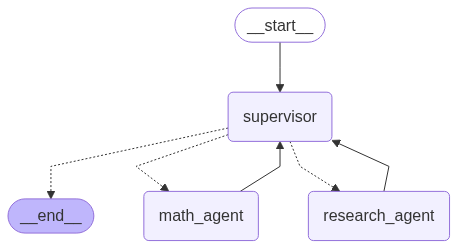

In [11]:
from IPython.display import display, Image
# Display the visual representation of the supervisor's graph
display(Image(supervisor.get_graph().draw_mermaid_png()))

This code brings your AI team to life! It demonstrates:

 * `Dynamic Task Delegation:` How the supervisor intelligently directs tasks to the most appropriate specialized agent.
 * `Sequential Execution:` How agents work in sequence, passing control back and forth via the supervisor.
 * `Complex Problem Solving:` The ability of your system to break down a multi-faceted problem (research + calculation) and solve it using different expert components.
 * `Observability:` How stream() and pretty_print_messages provide invaluable insights into the internal workings of complex AI systems, which is crucial for debugging and optimization.

 1. `for chunk in supervisor.stream(...):`

  * supervisor: This is your compiled supervisor agent, the "manager" of your AI team.
  * .stream(...): Just like with individual agents, you use stream() to run the supervisor. This means you'll receive updates incrementally as the supervisor makes decisions and delegates tasks to worker agents, and as those worker agents perform their work. You'll see the entire conversation unfold.
  ```
  {
    "messages": [
        {
            "role": "user",
            "content": "find US and New York state GDP in 2024. what % of US GDP was New York state?",
        }
    ]
}
```
This is the initial state passed to the supervisor. It's a deliberately complex query because it requires:
  * Research: To find the actual GDP figures for the US and New York state in 2024.
  * Math: To calculate the percentage of US GDP that New York state's GDP represents. This type of query is designed to trigger the supervisor's delegation logic to both your research_agent and your math_agent.

2. pretty_print_messages(chunk, last_message=True):

 * This is your helper function.
 * `chunk:` Each chunk yielded by supervisor.stream() represents a state update from a particular node (either the supervisor itself or one of the worker agents).
 * `last_message=True:` This additional parameter (if implemented in your helper) is set to True. It tells pretty_print_messages to only display the most recent message added to the state in that specific chunk. This helps keep the output concise and focuses on what just happened, which is especially useful in complex multi-agent flows.

In [13]:
for chunk in supervisor.stream( # 1. Execute the supervisor agent in streaming mode
    {
        "messages": [ # 2. The complex user query that requires delegation
            {
                "role": "user",
                "content": "find India and Karnataka state GDP in 2024. what % of INDIA GDP was Karnataka state?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True) # 3. Display updates, focusing on the last message

final_message_history = chunk["supervisor"]["messages"] # 4. Capture the complete history after execution

Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_research_agent

Successfully transferred to research_agent


Update from node research_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor

Successfully transferred back to supervisor


Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_math_agent

Successfully transferred to math_agent


Update from node math_agent:


================================= Tool Message =================================
Name: transfer_back_to_supervisor

Successfully transferred back to supervisor


Update from node supervisor:


================================== Ai Message ==================================
Name: supervisor

India's GDP in 2024 is estimated at 324.11 trillion INR, and Karnataka's GDP is about 25 trillion INR. Thi

This is a powerful technique for building more explicit and robust supervisor agents:

**Explicit Delegation:** Instead of the supervisor's LLM just emitting a generic `tool_call` that LangGraph then magically interprets as a transition, these handoff_tools give the LLM a direct action to perform the handoff. The LLM actually says, "I am going to transfer control to the research agent now."

**Fine-Grained Control:** The Command object offers incredible flexibility to control graph flow (goto), update state (update), and even manage subgraphs (graph). This is essential for highly dynamic and adaptive agent systems.

**Improved Observability:** Because the `handoff_tool` adds a `ToolMessage` to the state, your pretty_print_messages (or stream output) will clearly show when and to whom control was transferred, which is fantastic for debugging complex multi-agent interactions.

**Foundation for Complex Orchestration:** This pattern is key for building agents that can:
* Delegate tasks.
* Pass context along with the delegation.
* Receive control back.
* Make decisions about the next step in a multi-agent workflow.

We are now delving into one of the most powerful and flexible features of LangGraph: **explicitly controlling graph flow and state from within a tool!** This create_handoff_tool function is a sophisticated way to manage transitions between agents, giving the LLM more direct influence over the workflow.

1. New Imports
* `Annotated` from `typing`: This is a Python 3.9+ feature for adding metadata to type hints. It's used here to tell LangChain/LangGraph that certain function parameters should be "injected" automatically.
* `tool` from `langchain_core.tools`: This is a decorator (@tool) that you place above a Python function to turn it into a tool that an LLM can understand and call.
* `InjectedToolCallId` from `langchain_core.tools:` A special marker used with Annotated to tell LangGraph to inject the unique ID of the tool call that initiated the execution of this function. This ID is crucial for the tool to report its results back correctly.
* `InjectedState` from `langgraph.prebuilt:` Another special marker used with Annotated to tell LangGraph to inject the current graph state into the tool function when it's called. This allows the tool to read from or modify the shared state.
* `StateGraph, START, MessagesState from langgraph.graph:` These are core LangGraph components you're already familiar with (defining the graph, start node, and message-based state).
* `Command from langgraph.types:` This is the most important new concept here. A Command object allows a node (or a tool within a node) to directly influence the graph's execution flow and state. It's how a tool can tell the graph things like "go to this specific node next," "update the state this way," or "return to the parent graph."

2. `def create_handoff_tool(...) (A Tool Factory)`
 * This function isn't a tool itself; it's a factory function that creates and returns a new tool function each time it's called. This allows you to generate specialized handoff tools for each agent without writing repetitive code.

    * `agent_name: str:` The name of the agent to which this tool will hand off control (e.g., "research_agent", "math_agent"). This will also be used in the tool's own name and in the goto command.
    * `description: str | None = None:` A description for the tool, which the LLM will see.
3. The Inner `handoff_tool` Function (The Actual Tool) :
  This is the core of the magic, defined inside create_handoff_tool. This function will become a callable tool that an LLM can use.
  * `@tool(name, description=description):`
    * This decorator registers `handoff_tool` as a callable tool. The name (e.g., `"transfer_to_research_agent"`) and description (e.g., `"Assign task to a researcher agent.")` are what the LLM sees in its tool-use instructions. The LLM then knows when and how to call this tool.
  * `state: Annotated[MessagesState, InjectedState]:`
    * When the LLM calls this `handoff_tool`, LangGraph will automatically inject the current `MessagesState` (the full conversation history and other state variables) into the state parameter of this function. This gives the tool access to the current context.
 * `tool_call_id: Annotated[str, InjectedToolCallId]:`
    * `LangGraph` also injects the unique ID of the specific tool call that the LLM generated to invoke this `handoff_tool`. This `tool_call_id` is essential for creating a `ToolMessage` that correctly links back to the LLM's instruction.
 * `-> Command:`
    * This type hint indicates that this tool function will return a Command object. This is how the tool explicitly tells LangGraph what to do next with the execution flow.
 * `tool_message = {...}:`
    * This creates a dictionary representing a `ToolMessage`. This message will be added to the shared state's message history.
    * `"role":` "tool": Marks it as a message from a tool.
    * `"content":` f"Successfully transferred to {agent_name}": The content describes what the tool did (i.e., initiated a transfer).
    * `"name":` name: The name of the tool that generated this message (e.g., "transfer_to_research_agent").
    * `"tool_call_id":` tool_call_id: Links this ToolMessage back to the LLM's specific instruction to call this tool.

 * `return Command(...):` This is the core mechanism of the handoff.

   * `goto=agent_name:` This is the most important part. It explicitly tells LangGraph to immediately transition the graph's execution to the node named `agent_name`. So, if `agent_name` is `"research_agent"`, the graph will directly jump to the `research_agent` node. This is a direct, programmatic handoff of control.
  * `update={**state, "messages": state["messages"] + [tool_message]}:` This tells `LangGraph` to update the shared state. It takes the existing state (**state unpacks its contents) and adds the `tool_message` (created above) to the messages list. This effectively logs the handoff in the conversation history.
  * `graph=Command.PARENT:` This indicates that the goto command should operate within the context of the parent graph that called this tool. In your `supervisor` setup, the `supervisor's` graph is the "parent" of the handoff tool, and the goto command tells this parent graph to transition to a new node (e.g., research_agent).
4. Instantiating Handoff Tools
You are calling your `create_handoff_tool` factory function twice to create two specific handoff tools:
 * `assign_to_research_agent:` This tool, when called by an LLM, will direct the graph's flow to the `"research_agent"` node. Its name will be `transfer_to_research_agent`.
 * `assign_to_math_agent:` This tool, when called by an LLM, will direct the graph's flow to the `"math_agent"` node. Its name will be `transfer_to_math_agent`.


In [12]:
from typing import Annotated
from langchain_core.tools import tool, InjectedToolCallId
from langgraph.prebuilt import InjectedState
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.types import Command


def create_handoff_tool(*, agent_name: str, description: str | None = None):
    name = f"transfer_to_{agent_name}"
    description = description or f"Ask {agent_name} for help."

    @tool(name, description=description)
    def handoff_tool(
        state: Annotated[MessagesState, InjectedState],
        tool_call_id: Annotated[str, InjectedToolCallId],
    ) -> Command:
        tool_message = {
            "role": "tool",
            "content": f"Successfully transferred to {agent_name}",
            "name": name,
            "tool_call_id": tool_call_id,
        }
        return Command(
            goto=agent_name,
            update={**state, "messages": state["messages"] + [tool_message]},
            graph=Command.PARENT,
        )

    return handoff_tool


# Handoffs
assign_to_research_agent = create_handoff_tool(
    agent_name="research_agent",
    description="Assign task to a researcher agent.",
)

assign_to_math_agent = create_handoff_tool(
    agent_name="math_agent",
    description="Assign task to a math agent.",
)

Key Difference and Significance for AI Engineering:

The main difference between this `supervisor_agent` definition and the previous one (`create_supervisor` from `langgraph_supervisor`) is:

  * **create_supervisor (pre-built):** A higher-level abstraction. You tell it which agents it manages, and it internally handles the routing logic for delegation. It's convenient for standard supervisor patterns.
  * **create_react_agent (here):** You are building the supervisor as a standard `ReAct` agent, and its delegation capability comes from its explicit access to the `handoff_tools`.

Why this approach is powerful:

 * **More Granular Control:** By making the supervisor a ReAct agent that explicitly calls handoff tools, you have finer control over its decision-making process. The supervisor's LLM's `"thoughts"` will now show it reasoning about which handoff tool to use, and then showing the `ToolMessage` indicating the handoff.
 * **Transparency:** You can more easily inspect the `supervisor's` exact thought process (its `tool_calls` for `handoff`) in the execution trace.
 * **Customization:** If you wanted to add more complex delegation logic (e.g., passing specific arguments with the handoff, adding pre-delegation checks, or even routing to a human), defining the supervisor as a ReAct agent with custom tools makes that much easier.
 * **Flexibility:** This pattern is fundamental for building highly dynamic and adaptive multi-agent systems where the routing logic might not be simple sequential calls but involves complex conditions or even human intervention as "tools."

1. `supervisor_agent = create_react_agent(...):`

 * This is the most significant change. Instead of using a specialized `create_supervisor` helper, you are now using the general-purpose `create_react_agent` to build your supervisor.
 * This means your supervisor itself will follow the **Reasoning and Acting (ReAct)** pattern. Its "action" will be to choose and execute one of its "handoff" tools.
2. `model="openai:gpt-4.1":`
 * This is the LLM that serves as the "brain" for this `supervisor_agent`.
 * This LLM's job is to read the incoming user message (or the output from a worker agent) and decide which tool (which of the handoff tools) it needs to call to delegate the task.
3. `tools=[assign_to_research_agent, assign_to_math_agent]:`

  * **This is the most crucial part of this definition.**
  * Unlike the previous `create_supervisor` which implicitly understood how to delegate, this `supervisor_agent` is explicitly given the custom handoff tools you just defined **(assign_to_research_agent, assign_to_math_agent)**.
  * When the supervisor's LLM processes an input, it will consider these `assign_to_X_agent` tools as its available actions. If it decides a task needs `research`, it will generate a tool call to `assign_to_research_agent`. If it needs math, it will call assign_to_math_agent.
  * These `handoff` tools, as you learned, then return a Command that tells LangGraph to goto the specific worker agent's node directly.

4. `prompt=(...):`
  * This is the system prompt for this ReAct supervisor agent. It's very similar to the previous supervisor prompt, but now it's specifically guiding the ReAct agent's tool-use behavior.
  * It tells the supervisor's LLM:
     * `Its role:` "You are a supervisor managing two agents."
     * `How to delegate:` By instructing it to "Assign research-related tasks to this agent" (implying the use of assign_to_research_agent tool) and similarly for the math agent.
     * `Constraints:` "Assign work to one agent at a time, do not call agents in parallel." and "Do not do any work yourself." These constraints are vital for the supervisor's LLM to make correct delegation decisions.

5. `name="supervisor":`

This assigns the name `"supervisor"` to this specific `create_react_agent` instance. This name will be used when you define the overall `LangGraph` structure that includes this supervisor as a node.

In [13]:
supervisor_agent = create_react_agent(
    model="openai:gpt-4.1", # The LLM powering the supervisor
    tools=[assign_to_research_agent, assign_to_math_agent], # The supervisor's tools: how it delegates!
    prompt=( # The system prompt guiding the supervisor's delegation decisions
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this agent\n"
        "- a math agent. Assign math-related tasks to this agent\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    name="supervisor", # The name of this supervisor agent
)

When you run this supervisor graph (e.g., using supervisor.stream(...)):

* `Start (START):` The user's query enters the graph.
* `To Supervisor ("supervisor"):` The query immediately goes to your `supervisor_agent.`
* `Supervisor's Decision`:
  * The `supervisor_agent` (being a ReAct agent powered by its LLM) evaluates the user's query and its own prompt.
  * Based on the query's content, it decides which `handoff_tool` to call (`assign_to_research_agent` or `assign_to_math_agent`).
  * When it calls a `handoff_tool`, that tool's Command(goto=...) instruction directly tells the graph to jump to the respective worker agent's node.
* `Worker Agent Executes ("research_agent" or "math_agent"):`
  * The selected worker agent receives the delegated task.
  * It uses its own tools (e.g., web_search or add/multiply/divide) to perform its specialized task.
* Worker Returns to Supervisor ("supervisor"):
  * Once the worker agent completes its task and formulates its response (which is intended for the `supervisor`), the fixed edge (`.add_edge("research_agent", "supervisor")` or `.add_edge("math_agent", "supervisor"))` immediately returns control to the supervisor node.
* Supervisor Re-evaluates:
 * The supervisor_agent now has the original query, its own previous decisions, and the worker agent's output.
 * It re-evaluates the overall task. It might decide:
   * To call another worker agent (e.g., research_agent completed, now call math_agent).
   * That the task is complete, and it's time to generate a final answer to the original user query (in which case it would stop generating tool calls, and the graph would implicitly end as no further transitions are triggered).
   * To ask for clarification.

In [14]:
from langgraph.graph import END # Import the special END node

# Define the multi-agent supervisor graph
supervisor = (
    StateGraph(MessagesState) # 1. Initialize the graph with a shared state
    # 2. Add the supervisor_agent as a node in the overall graph
    # NOTE: `destinations` is only needed for visualization and doesn't affect runtime behavior
    .add_node(supervisor_agent, destinations=("research_agent", "math_agent", END))
    # 3. Add the worker agents as nodes
    .add_node(research_agent)
    .add_node(math_agent)
    # 4. Define the initial entry point
    .add_edge(START, "supervisor")
    # always return back to the supervisor
    # 5. Define the return paths from worker agents back to the supervisor
    .add_edge("research_agent", "supervisor")
    .add_edge("math_agent", "supervisor")
    .compile() # 6. Compile the graph for execution
)

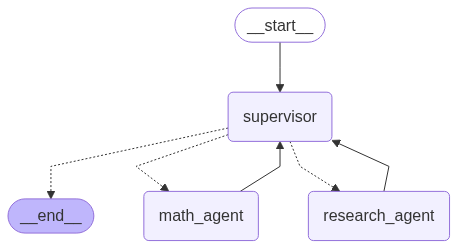

In [15]:
from IPython.display import display, Image

display(Image(supervisor.get_graph().draw_mermaid_png()))

In [17]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "find India and Karnataka State GDP in 2024. what % of India GDP was Karnataka state?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

final_message_history = chunk["supervisor"]["messages"]

Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_research_agent

Successfully transferred to research_agent


Update from node research_agent:


================================== Ai Message ==================================
Name: research_agent

- India's GDP for 2024 is estimated at $3.78 trillion USD (about ₹324.11 lakh crore). [Source: Wikipedia](https://en.wikipedia.org/wiki/Economy_of_India)
- Karnataka's GDP for 2024 is estimated at ₹25 trillion (₹25 lakh crore). [Source: Statista](https://www.statista.com/statistics/962125/india-gross-state-domestic-product-of-karnataka/)

Karnataka's share of India's GDP in 2024 is approximately 7.7%.


Update from node supervisor:


================================= Tool Message =================================
Name: transfer_to_math_agent

Successfully transferred to math_agent


Update from node math_agent:


================================== Ai Message ====

**Full Traceability:** This is incredibly important for understanding exactly how your multi-agent system arrived at its final answer. You can see the entire chain of thought, delegation, and tool use.

**Debugging:** If your system gives an incorrect answer or gets stuck, this full message history is your primary debugging tool. You can trace back to see which agent made what decision, what information it had, and what tools it called, helping you pinpoint issues.

**Observability:** It makes the complex internal workings of your AI team transparent, which is essential for building and maintaining sophisticated agentic systems.

In [18]:
for message in final_message_history:
    message.pretty_print()

================================ Human Message =================================

find India and Karnataka State GDP in 2024. what % of India GDP was Karnataka state?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_agent (call_uMcOepg7ihnDTXOj4FmNljvc)
 Call ID: call_uMcOepg7ihnDTXOj4FmNljvc
  Args:
================================= Tool Message =================================
Name: transfer_to_research_agent

Successfully transferred to research_agent
================================== Ai Message ==================================
Name: research_agent
Tool Calls:
  tavily_search (call_I8BROH2UTkiLxafOwwBFztUV)
 Call ID: call_I8BROH2UTkiLxafOwwBFztUV
  Args:
    query: India GDP in 2024
    search_depth: advanced
  tavily_search (call_v7SsxpSGc2T061t7VGKyhwKF)
 Call ID: call_v7SsxpSGc2T061t7VGKyhwKF
  Args:
    query: Karnataka state GDP in 2024
    search_depth: advanced
============================

Overall Significance :
This Send command and the `task_description` in the handoff tool are huge improvements for building robust multi-agent systems:

 * `Precise Delegation:` Instead of hoping a worker agent understands its task from a long, complex message history, the supervisor can now give it a direct, focused instruction.
 * `Context Isolation:` By creating agent_input with only the task_description_message (and potentially the full historical state for context), you can give the worker agents a clean, isolated view of their current sub-task. This prevents them from getting confused by irrelevant parts of the conversation.
 * `Reduced Ambiguity:` This explicit communication minimizes misunderstandings between agents, leading to more reliable task execution.
 * `Improved Debugging:` The task_description messages in your history will clearly show what instructions the supervisor gave to each worker, making the flow even more transparent.
 * `Robustness:` This pattern helps in building more resilient agents that can better handle complex multi-step problems by ensuring clear communication and task boundaries between specialized components.

  This new code introduces a way for your supervisor agent to not just delegate a task to a worker agent, but to also provide a specific, explicit task description or instruction along with that delegation. This makes the communication between agents much clearer and more robust.

1. New Import
```
from langgraph.types import Send
```
* `Send:` This is a crucial new `LangGraph` type. When you return a Command(goto=[Send(...)]) from a node (or a tool within a node), you are telling LangGraph to not just go to a target node, but to also send a specific input payload to that target node. This is the mechanism that allows the `task_description` to be passed explicitly.

2. ` def create_task_description_handoff_tool(...) (Enhanced Handoff Tool Factory) `
 * This is a more sophisticated version of your previous create_handoff_tool. Its purpose is to create a handoff tool that takes an explicit task_description as an argument from the calling LLM.
   * name = f"transfer_to_{agent_name}" and description = description or f"Ask {agent_name} for help.":
     * These are the same as before. They define the name and description that the supervisor LLM will see when deciding to use this tool.
  * `@tool(name, description=description):`
    * Again, this decorator turns the inner `handoff_tool` function into a callable tool for an LLM.

  * `def handoff_tool(...):` This is the actual tool function that will be created and exposed.
    * `task_description: Annotated[str, "Description of what the next agent should do, including all of the relevant context."]:`
      * This is the key addition. This parameter tells LangGraph that when the supervisor LLM decides to call this handoff_tool, the LLM is expected to provide a string value for task_description.
      * The string `"Description of what the next agent should do..."` serves as a docstring/description for the LLM, guiding it on what kind of string to generate for this argument.
      * This means the supervisor LLM will effectively say: `"Call transfer_to_research_agent with task_description='Please find the current GDP figures for X and Y.'"`
    * `state: Annotated[MessagesState, InjectedState],:`
       * Similar to before, the full current state of the graph is still InjectedState into the tool.
       * The comment # these parameters are ignored by the LLM is important: it means the LLM isn't expected to generate a value for state when calling the tool; LangGraph injects it automatically.
    * `-> Command:`
       * The tool still returns a Command object to control the graph's flow.
    * `task_description_message = {"role": "user", "content": task_description}:`
      * This creates a new message dictionary. Notice its role is "user" and its content is the `task_description` that the supervisor LLM just provided. This new message essentially simulates the supervisor "asking" the worker agent a direct question or giving it a specific instruction.
    * `agent_input = {**state, "messages": [task_description_message]}:`

      * This is the specific input payload that will be sent to the target worker agent.
      * It takes the **state (the entire current graph state, including all previous messages).
      * Crucially, it then replaces or overwrites the messages part of that state with a new list containing only the task_description_message. This means the worker agent primarily receives its task as a concise, direct instruction, rather than having to parse it out of the entire, potentially long, conversation history. This isolates the worker agent to its immediate sub-task.
    
   * `return Command(goto=[Send(agent_name, agent_input)], graph=Command.PARENT):`
    * `goto=[Send(agent_name, agent_input)]:` This is the core of the enhanced handoff.
    * Instead of goto=agent_name (which just transfers control), goto=[Send(target_node_name, input_payload)] explicitly instructs LangGraph to:
      1. Move execution to the node named agent_name.
      2. Pass the agent_input dictionary as the specific input to that agent_name node's LLM.
  * `graph=Command.PARENT:` Still indicates that the command operates within the context of the calling (supervisor's) graph.

  3. Instantiating Enhanced Handoff Tools
  ```
  assign_to_research_agent_with_description = create_task_description_handoff_tool(...)
assign_to_math_agent_with_description = create_task_description_handoff_tool(...)
```
  * These lines create specific instances of the new handoff_tool for your research_agent and math_agent. Now, when the supervisor calls these tools, it must provide a task_description.

  4. `supervisor_agent_with_description = create_react_agent(...)`
     * This creates your new supervisor agent.
     * `tools=[assign_to_research_agent_with_description, assign_to_math_agent_with_description]:`
       * This is the key. The supervisor's LLM is now given access to these new handoff tools. When the supervisor decides to delegate, it won't just call a tool; it will call a tool and pass it a specific task_description string.
     * prompt: The prompt remains similar, but the supervisor LLM's internal reasoning (due to the available tools) will lead it to generate clear task descriptions for its worker agents.

  5. `. supervisor_with_description = StateGraph(...)` (Overall Graph Definition)
    * This defines the overall graph structure, largely similar to your previous graph.
    * `.add_node(supervisor_agent_with_description, destinations=("research_agent", "math_agent")):`
      * The graph now uses the new supervisor_agent_with_description as its central orchestrator.
      * (Note: END is removed from destinations in this snippet compared to your previous one, which is a minor detail and doesn't change the core Send functionality. The graph will still end when the supervisor stops generating tool calls).
    * The edges remain the same: START to supervisor, and worker agents always returning to supervisor

In [19]:
from langgraph.types import Send


def create_task_description_handoff_tool(
    *, agent_name: str, description: str | None = None
):
    name = f"transfer_to_{agent_name}"
    description = description or f"Ask {agent_name} for help."

    @tool(name, description=description)
    def handoff_tool(
        # this is populated by the supervisor LLM
        task_description: Annotated[
            str,
            "Description of what the next agent should do, including all of the relevant context.",
        ],
        # these parameters are ignored by the LLM
        state: Annotated[MessagesState, InjectedState],
    ) -> Command:
        task_description_message = {"role": "user", "content": task_description}
        agent_input = {**state, "messages": [task_description_message]}
        return Command(
            goto=[Send(agent_name, agent_input)],
            graph=Command.PARENT,
        )

    return handoff_tool


assign_to_research_agent_with_description = create_task_description_handoff_tool(
    agent_name="research_agent",
    description="Assign task to a researcher agent.",
)

assign_to_math_agent_with_description = create_task_description_handoff_tool(
    agent_name="math_agent",
    description="Assign task to a math agent.",
)

supervisor_agent_with_description = create_react_agent(
    model="openai:gpt-4.1",
    tools=[
        assign_to_research_agent_with_description,
        assign_to_math_agent_with_description,
    ],
    prompt=(
        "You are a supervisor managing two agents:\n"
        "- a research agent. Assign research-related tasks to this assistant\n"
        "- a math agent. Assign math-related tasks to this assistant\n"
        "Assign work to one agent at a time, do not call agents in parallel.\n"
        "Do not do any work yourself."
    ),
    name="supervisor",
)

supervisor_with_description = (
    StateGraph(MessagesState)
    .add_node(
        supervisor_agent_with_description, destinations=("research_agent", "math_agent")
    )
    .add_node(research_agent)
    .add_node(math_agent)
    .add_edge(START, "supervisor")
    .add_edge("research_agent", "supervisor")
    .add_edge("math_agent", "supervisor")
    .compile()
)

In [21]:
for chunk in supervisor.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "find INDIA and Karnataka state GDP in 2024. what % of INDIA GDP was Karnataka state?",
            }
        ]
    },
    subgraphs=True,
):
    pretty_print_messages(chunk, last_message=True)

Update from subgraph supervisor:


	Update from node agent:


	================================== Ai Message ==================================
	Name: supervisor
	Tool Calls:
	  transfer_to_research_agent (call_CsaresMBUWcIUQZVx98zWRvU)
	 Call ID: call_CsaresMBUWcIUQZVx98zWRvU
	  Args:


Update from subgraph research_agent:


	Update from node agent:


	================================== Ai Message ==================================
	Name: research_agent
	Tool Calls:
	  tavily_search (call_nk3NWmQzquyKS6lhkAG09fms)
	 Call ID: call_nk3NWmQzquyKS6lhkAG09fms
	  Args:
	    query: India GDP 2024
	    search_depth: advanced
	  tavily_search (call_qpmq1GQYgMX8DkxfhPu79emL)
	 Call ID: call_qpmq1GQYgMX8DkxfhPu79emL
	  Args:
	    query: Karnataka state GDP 2024
	    search_depth: advanced


Update from subgraph research_agent:


	Update from node tools:


	================================= Tool Message =================================
	Name: tavily_search
	
	{"query": "India GDP 2024", "follow_

# Questions & Clarifications

a. How langchain-openai package is different from langchain[openai]
  * langchain[openai]:

      * This is the older way of installing OpenAI integrations within LangChain.
      * When you install langchain[openai], it means you are installing the core langchain library, and simultaneously, pip will install the necessary dependencies for OpenAI integrations alongside the core LangChain package. These dependencies were often "bundled" with langchain itself, but only activated if you specified the [openai] extra.
      * This approach meant that the core langchain package became quite large over time, as it had to manage many optional dependencies for different providers.
      * langchain (the base package): This is the core LangChain library. It provides the fundamental abstractions, classes, and tools (like BaseChatModel, PromptTemplate, Runnable, AgentExecutor, etc.) that are common across all LLM providers and integrations. It defines what an LLM or a chat model is, but it doesn't contain the specific code to connect to any particular LLM provider (like OpenAI, Anthropic, Google, etc.).
      * It tells pip: "Install the base langchain package, AND also install all the additional dependencies that are needed for the openai integration."
      * What it does internally: When you use langchain[openai], pip will automatically install the langchain-openai package (and any other underlying dependencies required for it) for you. It's a convenience mechanism.
      * When you use it: This was a more common way to install specific integrations in older versions of LangChain or when you wanted a quick way to get the core langchain with a specific integration without explicitly installing the separate partner package. While it still works, the more modern approach often encourages explicit installation of langchain-openai if that's what you need.

  * langchain-openai:

     * langchain-openai is a separate, dedicated package (often called an "integrations package" or "partner package"). It lives independently of the core langchain library.

     * It contains only the code and dependencies specifically required for interacting with OpenAI's models (like ChatOpenAI, OpenAIEmbeddings, etc.).
     * Its sole purpose is to provide the specific integration code for OpenAI's models within the LangChain framework. This includes classes like ChatOpenAI, OpenAIEmbeddings, OpenAI, and AzureOpenAI.
     * Why it exists: LangChain's architecture has moved towards a "partner package" model. Instead of having all integrations bundled into one massive langchain package, they are now separated into smaller, dedicated packages like langchain-openai, langchain-google-genai, langchain-community, etc. This makes the core langchain package lighter, reduces unnecessary dependencies, and allows partner packages to be developed and released more independently.
     * When you use it: You explicitly pip install langchain-openai when you know you'll be working with OpenAI models. Then you'd import directly from it, e.g., from langchain_openai import ChatOpenAI.
     * Why this change? LangChain moved to a modular approach to:

       * Reduce langchain's footprint: The core langchain package becomes much lighter.
       * Improve dependency management: You only install what you need, avoiding conflicts or unnecessary packages.
       * Faster development/releases: Integrations can be updated and released independently of the core library.
       * Clearer separation of concerns: The core framework is separate from specific provider integrations.

   * In your code: When you see from langchain_openai import ChatOpenAI, you are directly importing from this dedicated langchain-openai package. This is the modern practice.

   In essence: langchain[openai] was a way to get OpenAI dependencies with the monolithic langchain package. langchain-openai is a distinct, smaller, and focused package dedicated only to OpenAI integrations, requiring a separate pip install. In summary:
  
     * langchain-openai: The actual Python package containing the OpenAI integration code.
     * langchain[openai]: A convenience syntax for pip install that ensures the langchain-openai package (and its dependencies) are installed alongside the core langchain package.


b. How tanvily search is different from duckduckgosearch

Both Tavily Search and DuckDuckGo Search provide web search capabilities that can be integrated into AI agents, but they differ significantly in their design, purpose, and features for this use case.

1. `DuckDuckGo Search (via LangChain's DuckDuckGoSearchRun or similar):`

   * Nature: It's an integration with the standard DuckDuckGo search engine.
   * Primary Goal: DuckDuckGo's main focus is privacy. It aims to provide search results without tracking your personal information or search history.
  * For AI Agents:
     * Free: Generally free to use (though there might be rate limits if you hammer it too hard).
     * Standard Web Search Results: It returns standard search result snippets (title, URL, brief description) similar to what you'd see in a browser.
     * Less Optimized for LLMs: While usable, the raw search results might require more post-processing by your LLM to extract the most relevant information for an answer. It's not specifically designed to filter or summarize content for an LLM's consumption.
     * Rate Limits: Being a public search engine, it might have more aggressive rate limits for programmatic access compared to APIs designed for agents.

2. `Tavily Search (via langchain-tavily):`

   * `Nature:` It's a search API specifically optimized for AI agents and LLMs. It's not just a wrapper around a general-purpose search engine.
   * `Primary Goal:` To provide highly relevant, concise, and structured search results that are directly usable by LLMs for tasks like RAG, fact-checking, and agentic reasoning. It aims to reduce hallucination and provide accurate context.
   * For AI Agents:
     * Purpose-Built for LLMs/RAG: This is its biggest differentiator. Tavily focuses on searching, scraping, filtering, and extracting the most relevant information from online sources in a single API call. It often provides content snippets or even AI-generated summaries specifically tailored for RAG.
     * Paid Service (with Free Tiers/Credits): While it's a commercial product, it typically offers generous free credits or low-cost tiers for development and initial usage.
     * Structured Output: Results are often more structured and easier for an LLM to parse and use as context, potentially including cleaned content from web pages, not just snippets.
     * Customization: Offers features like customizable search depths, domain management (include/exclude specific websites), and control over HTML parsing.
     * Performance: Designed for speed and efficiency for programmatic access.
     * Reduced LLM Load: By providing more pre-processed and relevant content, it can potentially reduce the amount of reasoning and parsing your LLM needs to do, which can save tokens and improve answer quality.

    In summary:

      `DuckDuckGo Search`: Good for basic, free, privacy-focused web search when you need general results and your LLM can handle more post-processing.

     `Tavily Search`: Preferred for AI agents when you need highly optimized, pre-processed, and relevant search results specifically for LLM consumption, aiming to improve RAG accuracy and reduce hallucination, even if it comes with a cost (or free tier).

c. Is it possible to get to the source code of TavilySearch ?
   * Search on GitHub: The most straightforward way is to go to GitHub.com and search for "langchain-tavily" or "tavily-ai/langchain-tavily".
   * Check the Documentation: LangChain's official documentation for TavilySearch (e.g., python.langchain.com/docs/integrations/tools/tavily_search/) will almost always have a link to the relevant GitHub repository.
   * Check PyPI: If you go to the PyPI page for langchain-tavily (search "langchain-tavily pypi"), you'll usually find a "Homepage" or "Source Code" link that points to the GitHub repository.
   * GitHub Repository: https://github.com/tavily-ai/langchain-tavily
   * tavily-python. You can find that here: https://github.com/tavily-ai/tavily-python